In [1]:
#get libraries
import os

import phydrus as ps

import pandas as pd

import numpy as np


In [ ]:
#Working directory stuff
#set working directory manually
os.chdir('C:\\Users\\meghanrobinson\\Downloads\\Modeling\\PHydrusTest\\Hydrus')
os.getcwd()

#give location for exe file
exe = os.path.join(os.getcwd(), "H1D_CALC.EXE")


INFO: Successfully wrote test1\SELECTOR.IN
INFO: Successfully wrote test1\PROFILE.DAT
INFO: Hydrus-1D Simulation Successful.


<Axes: xlabel='h [cm]', ylabel='depth [cm]'>

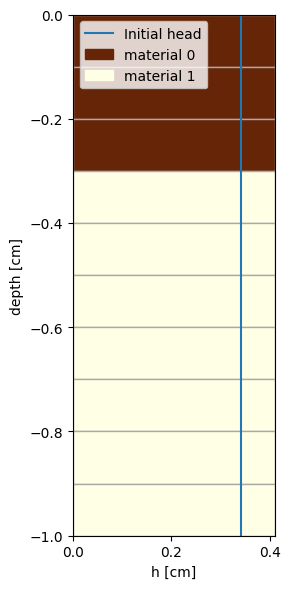

In [5]:
#Run example from online 
ws = "test1"

desc = "Infiltration and drainage in a large caisson"

ml = ps.Model(exe_name=exe, ws_name=ws, name="model", description=desc,
              mass_units="mmol", time_unit="min", length_unit="cm")

times = ml.add_time_info(tinit=90, tmax=273, print_times=True, dt=0.1,
                         dtmax=0.5, printinit=120)

ml.add_waterflow(top_bc=1, bot_bc=0, rtop=0)

m = ml.get_empty_material_df(n=2)
m.loc[1:2] = [[0.08, 0.3421, 0.03, 5, 1, -0.5],
              [0.08, 0.3421, 0.03, 5, 0.1, -0.5]]

ml.add_material(m)

profile = ps.create_profile(h=0.342)
profile.loc[5:11, "Mat"] = 2
ml.add_profile(profile)

# atm = pd.read_csv("seep/orig/ATMOSPH.IN", skiprows=5, skipfooter=1,
#                   skipinitialspace=True, delim_whitespace=True)
# ml.add_atmosphere(atm)

ml.write_input()
rs = ml.simulate()
ml.plots.profile()

In [11]:
#testing single code lines

#list(range(1,50)) #this works as a substitute for c() for sequence of numbers
#seq= np.array([0,0,1,0,0.5]) #this is like c() for non sequential numbers
#[*seq, *seq] #this repeats array from previous line
#np.repeat(0.01, 10) #repeat a single number alot of times

#m = ml.get_empty_material_df(n=2)
#m

#np.concatenate(seq,seq)

seq= np.array([0,0,1,0,0.5]) #sequence to repeat for rain
rainall = [*seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq]

#apparently the code above produces a 'list', I think I want it to be a vector?
rainflat= ''.join(str(x) for x in rainall) #vector code?
rainflat
#rainflat = np.concatenate(rainall)


'0.00.01.00.00.50.00.01.00.00.50.00.01.00.00.50.00.01.00.00.50.00.01.00.00.50.00.01.00.00.50.00.01.00.00.50.00.01.00.00.50.00.01.00.00.50.00.01.00.00.5'

INFO: Successfully wrote sptest2\SELECTOR.IN
INFO: Successfully wrote sptest2\PROFILE.DAT
INFO: Successfully wrote sptest2\ATMOSPH.IN
INFO: Old 'Error.msg' file removed.
INFO: Hydrus-1D Simulation Successful.


<Axes: xlabel='h [cm]', ylabel='depth [cm]'>

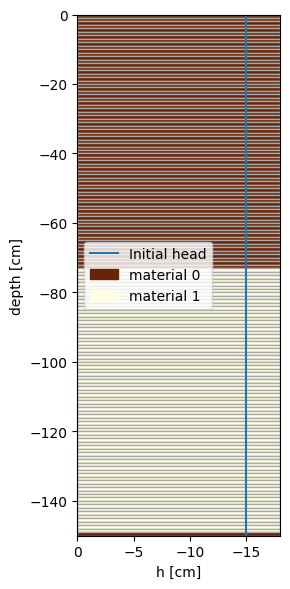

In [17]:
#Seeing what I can change (single porosity)
#THIS WORKS AS IS RIGHT NOW
exe = os.path.join(os.getcwd(), "H1D_CALC.exe") #DualPerm exe file

ws= "sptest2" #name folder

#basic model info (name, units)
ml = ps.Model(exe_name=exe, #telling it to use DP exe
              ws_name=ws, name="model",
              mass_units="mmol", time_unit="days", length_unit="cm")

#add time info
times = ml.add_time_info(tinit=0, #first day
                         tmax=49, #last day
                         print_times=True, #true if want model to print t level info every day
                        # printinit= 1,
                         #printmax= 40,
                         #dtprint= 1,
                         dt=0.004, #initial time increment (this is what R iteratres through?)
                         dtmax=0.5, #max time increment (didn't change)
                         #printinit=120 #this would specify when to start printing t level info
                        )

#add atmosphere/weather info
#make set of random data
daycount = list(range(1,50))
seq= np.array([0,0,1,0,0.5]) #sequence to repeat for rain
rainall = [*seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq]
evap= np.repeat(0.01,50)
evapl= evap.tolist()
transp= np.repeat(0, 50)
transpl= transp.tolist()
hcrita= np.repeat(1000000,50)
hcrital= hcrita.tolist()

#make into dataframe
atmdf= pd.DataFrame(list(zip(daycount,
                             rainall,evap,
                            transpl, hcrital,
                            transpl, transpl, transpl)),
                    columns=['tAtm', 'Prec', 'rSoil', 'rRoot', 'hCritA', 'rB', 'hB', 'hT'])

#make columns into int64, apparently float64 doesn't work
atmdf['Prec'] = atmdf['Prec'].astype(np.int64)
atmdf['rSoil'] = atmdf['rSoil'].astype(np.int64)

#add atmosphere input to Hydrus?
ml.add_atmospheric_bc(atmdf)

#add waterflow information for selector on model type, boundary conditions, can add groundwater here (didn't)
ml.add_waterflow(model= 0, #single porosity
                 top_bc=3, #top boundary condition is atmospheric with runoff
                 bot_bc=4, #bottom boundary condition is free drainage
                 )

#this is a dataframe for soil materials, n=2 is number of materials
m = ml.get_empty_material_df(n=2)

#these are vg parameters for each depth
m.loc[1:2] = [[0.08, 0.3421, 0.03, 1.4, 1, 0.5],
              [0.08, 0.3421, 0.03, 2, 0.1, 0.5]]

#add materials to function
ml.add_material(m)

#create soil profile
profile = ps.create_profile(bot= -150, #depth of soil profile
                            dx= 1, #grid cells 1 cm
                            h=-15 #intial pressure head
                           )
profile.loc[75:150, "Mat"] = 2 #depth to start second soil material
#add  profile to model
ml.add_profile(profile)

#observations nodes
ml.add_obs_nodes([-10,-50,-90,-110])

#to do later:transpiration

#run Hydrus
ml.write_input()
rs = ml.simulate()
ml.plots.profile()

INFO: Successfully wrote dualporositytest\SELECTOR.IN
INFO: Successfully wrote dualporositytest\PROFILE.DAT
INFO: Successfully wrote dualporositytest\ATMOSPH.IN
INFO: Old 'Error.msg' file removed.
INFO: Hydrus-1D Simulation Successful.


<Axes: xlabel='h [cm]', ylabel='depth [cm]'>

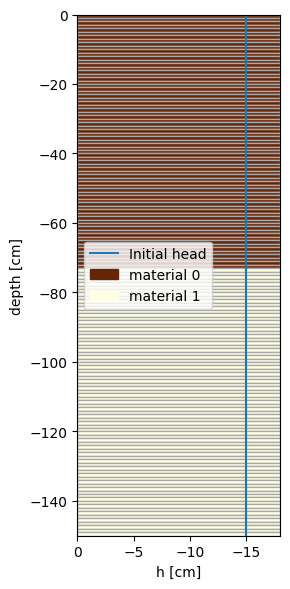

In [47]:
#Seeing what I can change (dual porosity)
#Works!
exe = os.path.join(os.getcwd(), "H1D_CALC.exe") #DualPerm exe file

ws= "dualporositytest" #name folder

#basic model info (name, units)
ml = ps.Model(exe_name=exe, #telling it to use DP exe
              ws_name=ws, name="model",
              mass_units="mmol", time_unit="days", length_unit="cm")

#time info
times = ml.add_time_info(tinit=0, #first day
                         tmax=49, #last day
                         print_times=True, #true if want model to print t level info every day
                        # printinit= 1,
                         #printmax= 40,
                         #dtprint= 1,
                         dt=0.004, #initial time increment (this is what R iteratres through?)
                         dtmax=0.5, #max time increment (didn't change)
                         #printinit=120 #this would specify when to start printing t level info
                        )

#add waterflow information for selector on model type, boundary conditions, can add groundwater here (didn't)
ml.add_waterflow(model= 7, #single porosity
                 top_bc=3, #top boundary condition is atmospheric with runoff
                 bot_bc=4 #bottom boundary condition is free drainage
                 )

#this is a dataframe for soil materials, n=2 is number of materials
m = ml.get_empty_material_df(n=2)

#these are vg parameters for each depth
m.loc[1:2] = [[0.08, 0.3421, 0.03, 1.4, 1, 0.5, 0.02, 0.1, 0.004, 1.23, 0.0001],
              [0.08, 0.3421, 0.03, 2, 0.1, 0.5, 0.02, 0.1, 0.004, 1.23, 0.0001]]

#add materials to function
ml.add_material(m)

#create soil profile
profile = ps.create_profile(bot= -150, #depth of soil profile
                            dx= 1, #grid cells 1 cm
                            h=-15 #intial pressure head
                           )
profile.loc[75:151, "Mat"] = 2 #depth to start second soil material
#add  profile to model
ml.add_profile(profile)

#observations nodes
ml.add_obs_nodes([-10,-50,-90,-110])

#add root growth
ml.add_root_growth(irootin= 0, #roots are specified as part of atmospheric input
                  )

#and root water uptake
poptms= [-1,-1]
ml.add_root_uptake(model= 0, #feddes water uptake
                   p0= -1, #pressure head below which roots can extract water from soil
                   p2h= -500, #pressure head below which roots cannot extract water at maximum rate
                   p2l= -900, #manual says same as p2h exceot with potential transpiration of 'r2L'
                   p3= -1600, #wilting point: no root water extraction
                   r2h= 0.5,
                   r2l= 0.1,
                   poptm= poptms, #pressure head below which roots extract water at max rate, 1 per soil type
                   pexp= 3, #exponent for stress response function, accepting default of 3
                   crootmax= 1 #this is max concentration of solute for root uptake, this model doesn't have solutes but isn't working without
                   )

#atmosphere info
#make dataframe
daycount = list(range(1,50))
seq= np.array([0,0,1,0,0.5]) #sequence to repeat for rain
rainall = [*seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq]
evap= np.repeat(0.01,50)
evapl= evap.tolist()
transp= np.repeat(0, 50)
transpl= transp.tolist()
hcrita= np.repeat(1000000,50)
hcrital= hcrita.tolist()
roots1= list(range(1,30))
roots2 = np.repeat(30,20)
roots2l = roots2.tolist()
roots= [*roots1, *roots2l]


#make into dataframe
atmdf= pd.DataFrame(list(zip(daycount,
                             rainall,evap,
                            transpl, hcrital,
                            transpl, transpl, transpl, roots)),
                    columns=['tAtm', 'Prec', 'rSoil', 'rRoot', 'hCritA', 'rB', 'hB', 'hT', 'RootDepth'])

#make columns into int64, apparently float64 doesn't work
atmdf['Prec'] = atmdf['Prec'].astype(np.int64)
atmdf['rSoil'] = atmdf['rSoil'].astype(np.int64)

#add atmosphere input to Hydrus?
ml.add_atmospheric_bc(atmdf)

#run Hydrus
ml.write_input()
rs = ml.simulate()
ml.plots.profile()

In [48]:
ml.materials["water"]

,thr,ths,Alfa,n,Ks,l,thr_im,ths_im,Alfa_im,n_im,Ka
1,0.08,0.3421,0.03,1.4,1.0,0.5,0.02,0.1,0.004,1.23,0.0001
2,0.08,0.3421,0.03,2.0,0.1,0.5,0.02,0.1,0.004,1.23,0.0001


INFO: Successfully wrote dptest\SELECTOR.IN
INFO: Successfully wrote dptest\PROFILE.DAT
INFO: Successfully wrote dptest\ATMOSPH.IN
INFO: Old 'Error.msg' file removed.


KeyError: 'Ks'

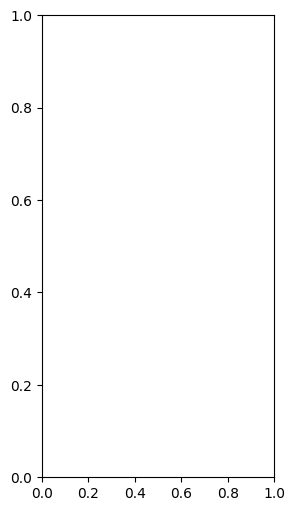

In [56]:
#Seeing what I can change (dual permeability?)
exedp = os.path.join(os.getcwd(), "H1D_Dual.exe") #DualPerm exe file

ws= "dptest" #name folder

#basic model info (name, units)
ml = ps.Model(exe_name=exedp, #telling it to use DP exe
              ws_name=ws, name="model", 
              mass_units="mmol", time_unit="days", length_unit="cm")

#time info
times = ml.add_time_info(tinit=0, #first day
                         tmax=49, #last day
                         print_times=True, #true if want model to print t level info every day
                        # printinit= 1,
                         #printmax= 40,
                         #dtprint= 1,
                         dt=0.004, #initial time increment (this is what R iteratres through?)
                         dtmax=0.5, #max time increment (didn't change)
                         #printinit=120 #this would specify when to start printing t level info
                        )

#atmosphere info
#make dataframe
daycount = list(range(1,50))
seq= np.array([0,0,1,0,0.5]) #sequence to repeat for rain
rainall = [*seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq]
evap= np.repeat(0.01,50)
evapl= evap.tolist()
transp= np.repeat(0, 50)
transpl= transp.tolist()
hcrita= np.repeat(1000000,50)
hcrital= hcrita.tolist()

#make into dataframe
atmdf= pd.DataFrame(list(zip(daycount,
                             rainall,evap,
                            transpl, hcrital)),
                    columns=['tAtm', 'Prec', 'rSoil', 'rRoot', 'hCritA'])

#make columns into int64, apparently float64 doesn't work
atmdf['Prec'] = atmdf['Prec'].astype(np.int64)
atmdf['rSoil'] = atmdf['rSoil'].astype(np.int64)

#add atmosphere input to Hydrus?
ml.add_atmospheric_bc(atmdf)

#add waterflow information for selector on model type, boundary conditions, can add groundwater here (didn't)
ml.add_waterflow(model= 9, #dual permeability
                 top_bc=3, #top boundary condition is atmospheric with runoff
                 bot_bc=4, #bottom boundary condition is free drainage
                 )

#this is a dataframe for soil materials, n=2 is number of materials
m = ml.get_empty_material_df(n=2)

#these are vg parameters for each depth
m.loc[1:2] = [[0.08, 0.3421, 0.03, 1.4, 1, 0.5, 0.01, 0.3, 0.003, 1.6, 15, 0.5, 0.01, 1.5, 0.4, 2, 0.05],
              [0.08, 0.3421, 0.03, 2, 0.1, 0.5, 0.01, 0.3, 0.003, 1.6, 15, 0.5, 0.01, 1.5, 0.4, 2, 0.05]]
#m.columns = ["thr", "ths", "Alfa", "n" "Ks", "l", "thrFr", "thsFf", "AlfaFr ", "nFr", "KsFr", "lFr", "W", "beta", "gamma", "a", "Ka"]
#add materials to function
ml.add_material(m)

#create soil profile
profile = ps.create_profile(bot= -150, #depth of soil profile
                            dx= 1, #grid cells 1 cm
                            h=-15 #intial pressure head
                           )
profile.loc[75:150, "Mat"] = 2 #depth to start second soil material
#add  profile to model
ml.add_profile(profile)

#observations nodes
ml.add_obs_nodes([-10,-50,-90,-110])

#to do later:transpiration

#run Hydrus
ml.write_input()
rs = ml.simulate()
ml.plots.profile()

In [66]:
ml.materials["water"].rename=(columns== {0:"thr", 1:"ths", 2:"Alfa", 3:"n", 4:"Ks",
                                        5:"l", 6:"thrFr", 7:"thsFf", 8:"AlfaFr ", 9:"nFr",
                                        10:"KsFr", 11:"lFr", 12:"W", 13:"beta", 14:"gamma", 15:"a", 16:"Ka"},inplace=True)
ml.materials["water"].columns


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3509353033.py, line 3)

In [10]:
daycount = list(range(1,50))
seq= np.array([0,0,1,0,0.5]) #sequence to repeat for rain
rainall = [*seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq, *seq]
evap= np.repeat(0.01,50)
evapl= evap.tolist()
transp= np.repeat(0, 50)
transpl= transp.tolist()
hcrita= np.repeat(1000000,50)
hcrital= hcrita.tolist()

#DOES WORK!
atmdf= pd.DataFrame(list(zip(daycount,
                             rainall,evap,
                            transpl, hcrital,
                            transpl, transpl, transpl)),
                    columns=['tAtm', 'Prec', 'rSoil', 'rRoot', 'hCritA', 'rB', 'hB', 'hT'])

atmdf
print(atmdf.dtypes)

#does not work
#columns= ['tAtm', 'Prec', 'rSoil', 'rRoot', 'hCritA', 'rB', 'hB', 'hT']
#data= [list(range(1,50)),
 #     rainall,
  #    evapl,
   #   transpl,
    #  hcrital,
     # transpl,
      #transpl,
      #transpl]

#data

#atmdf= pd.DataFrame(data, columns=columns)
#atmdf

#Does not work
#make data frame just for test
#atmdata = {
 #   'tAtm'== list(range(1,50)), #date number
  #  'Prec'== rainflat, #precipitation
   # 'rSoil'== evapl, #potential evaporation
    #'rRoot'== transpl, #potential transpiration
    #'hCritA'== hcrital, #minimum pressure head allowed at soil surface
    #'rB'== transpl, #bottom flux, =0 if using free drainage, so using the repeated 0 array for transpiration
    #'hB'== transpl, #groundwater level or prescribed pressure head, =0 if using free drainage
    #'hT'== transpl #pressure head at surface, setting to zero because I think that is what I should do? 
#}

#atmdf= pd.DataFrame(atmdata) #make into dataframe

#atmdf

tAtm        int64
Prec      float64
rSoil     float64
rRoot       int64
hCritA      int64
rB          int64
hB          int64
hT          int64
dtype: object


In [26]:
#roots1= list(range(1,30))
#roots2 = np.repeat(30,20)
#roots2l = roots2.tolist()
#roots2l
#roots= [*roots1, *roots2l]
#roots

poptms = [-1,-1]
type(poptms)

list

In [45]:
import inspect

#lines= inspect.getsource(ml.add_waterflow)
#print(lines) #looks like dual permeability is included as a model option

#lines= inspect.getsource(ml.get_empty_material_df) #looks like it has the option for enough vg parameters
#print(lines)

lines= inspect.getsource(ml.plots.profile)
print(lines)

    def profile(self, figsize=(3, 6), title=None, cmap="YlOrBr",
                color_by="Ks", show_grid=True, **kwargs):
        """
        Method to plot the soil profile.

        Parameters
        ----------
        figsize: tuple, optional
            Tuple with the size of the figure in inches.
        title: str, optional
            String with the title of the Figure.
        cmap: str, optional
            String with a named Matplotlib colormap.
        color_by: str, optional
            Column from the material properties sed to color the materials.
            Default is "Ks".
        show_grid: bool, optional
            Show the grid in the plot. Default is True.

        Returns
        -------
        ax: matplotlib axes instance

        """
        _, ax = plt.subplots(figsize=figsize, **kwargs)

        top = self.ml.profile.loc[:, "x"].max()
        w = self.ml.profile.loc[:, "h"].max()
        w = w + 0.2 * w

        # Set colors by color_by
        col = sel